In [3]:
data = read.csv('ChickData.csv')

In [5]:
names(data)

[1] "weight" "feed"

In [6]:
dim(data)

[1] 23  2

In [8]:
head(data, 3)

,weight,feed
,<int>,<chr>
1,325,meatmeal
2,257,meatmeal
3,303,meatmeal


In [15]:
table(data$feed)


  casein meatmeal 
      12       11 

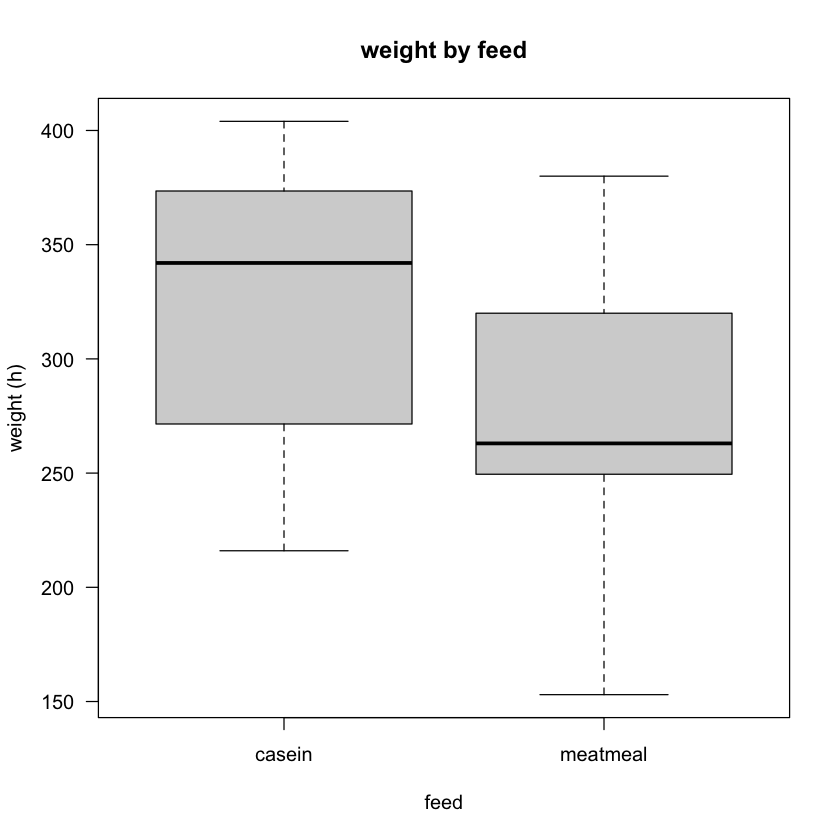

In [21]:
par(bg = 'white')
boxplot(data$weight~data$feed, las=1, ylab='weight (h)', xlab='feed', main='weight by feed')

In [25]:
mean(data$weight[data$feed == 'casein'])

[1] 323.5833

In [26]:
mean(data$weight[data$feed == 'meatmeal'])

[1] 276.9091

In [27]:
test.stat1 = abs(
    mean(data$weight[data$feed == 'casein']) - 
    mean(data$weight[data$feed == 'meatmeal'])
)

In [28]:
test.stat1

[1] 46.67424

In [29]:
test.stat2 = abs(
    median(data$weight[data$feed == 'casein']) - 
    median(data$weight[data$feed == 'meatmeal'])
)

In [30]:
test.stat2

[1] 79

In [31]:
set.seed(1998)

In [37]:
n = dim(data)[1]

In [38]:
p = 100000

In [39]:
variable = data$weight

In [41]:
permutation_samples = matrix(0, nrow = n, ncol = p)

In [43]:
for (i in 1:p) {
    permutation_samples[, i] = sample(variable, size = n, replace = F)
}

In [57]:
permutation.stat1 = matrix(0, nrow = p, ncol = 1)
for (i in 1:p) {
    permutation.stat1[i] = abs(
        mean(permutation_samples[, i][data$feed == 'casein']) - 
        mean(permutation_samples[, i][data$feed == 'meatmeal'])
    )
}

In [58]:
permutation.stat2 = matrix(0, nrow = p, ncol = 1)
for (i in 1:p) {
    permutation.stat2[i] = abs(
        median(permutation_samples[, i][data$feed == 'casein']) - 
        median(permutation_samples[, i][data$feed == 'meatmeal'])
    )
}

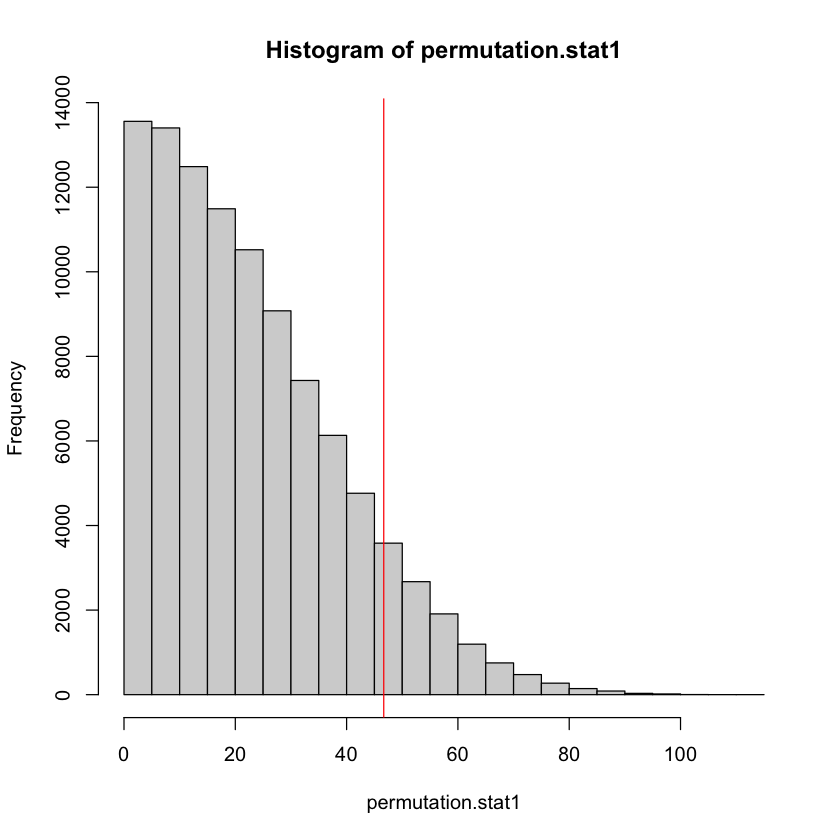

In [59]:
par(bg = 'white')
hist(permutation.stat1)
abline(v=test.stat1, col='red')

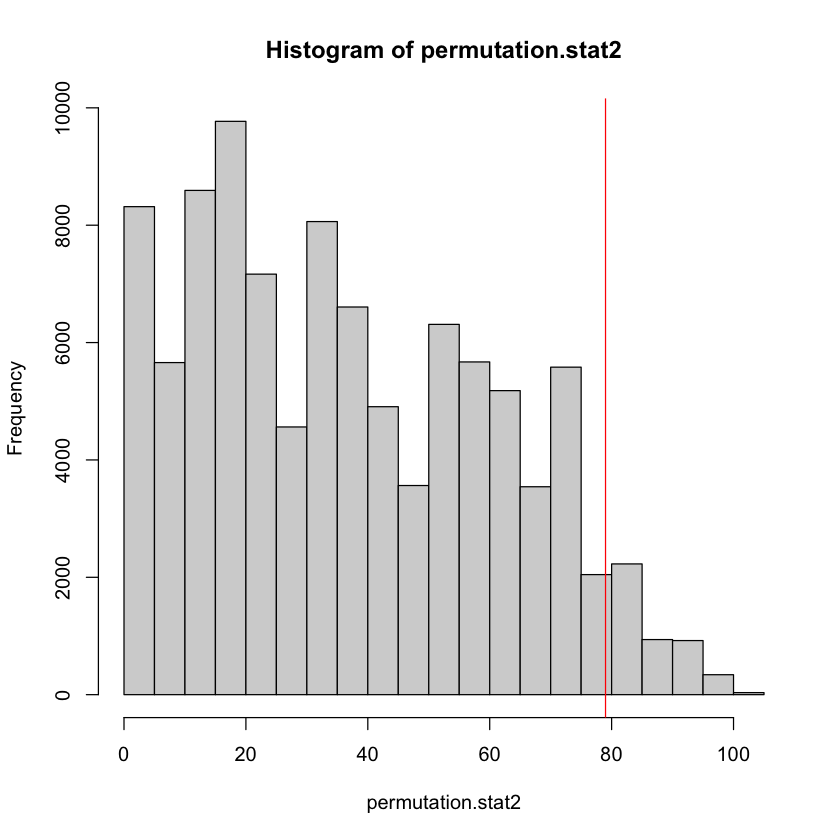

In [60]:
par(bg = 'white')
hist(permutation.stat2)
abline(v=test.stat2, col='red')

In [76]:
mean(test.stat1 < permutation.stat1)

[1] 0.09789

In [77]:
mean(test.stat2 < permutation.stat2)

[1] 0.04787